<a href="https://colab.research.google.com/github/don1504/don/blob/main/0708_openCV_canny%2BHSV%2BGaussian_Block%2B%EB%85%B9%EC%83%89%EC%8B%A0%ED%98%B8%EB%93%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Google Colab Ïã†Ìò∏Îì± Ïù∏Ïãù ÌÖåÏä§Ìä∏ ===
1. upload_and_detect() - Í∏∞Î≥∏ Í≤ÄÏ∂ú
2. adjust_parameters_and_test() - ÌååÎùºÎØ∏ÌÑ∞ ÎπÑÍµê ÌÖåÏä§Ìä∏

ÏÇ¨Ïö©Î≤ï:
upload_and_detect()  # Ïù¥ Ìï®ÏàòÎ•º Ïã§ÌñâÌïòÏÑ∏Ïöî
Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ ÏÑ†ÌÉùÌï¥Ï£ºÏÑ∏Ïöî...


Saving KakaoTalk_20250708_085906042.png to KakaoTalk_20250708_085906042 (1).png

Ï≤òÎ¶¨Ï§ë: KakaoTalk_20250708_085906042 (1).png


/tmp/ipython-input-4-1721441805.py:117: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


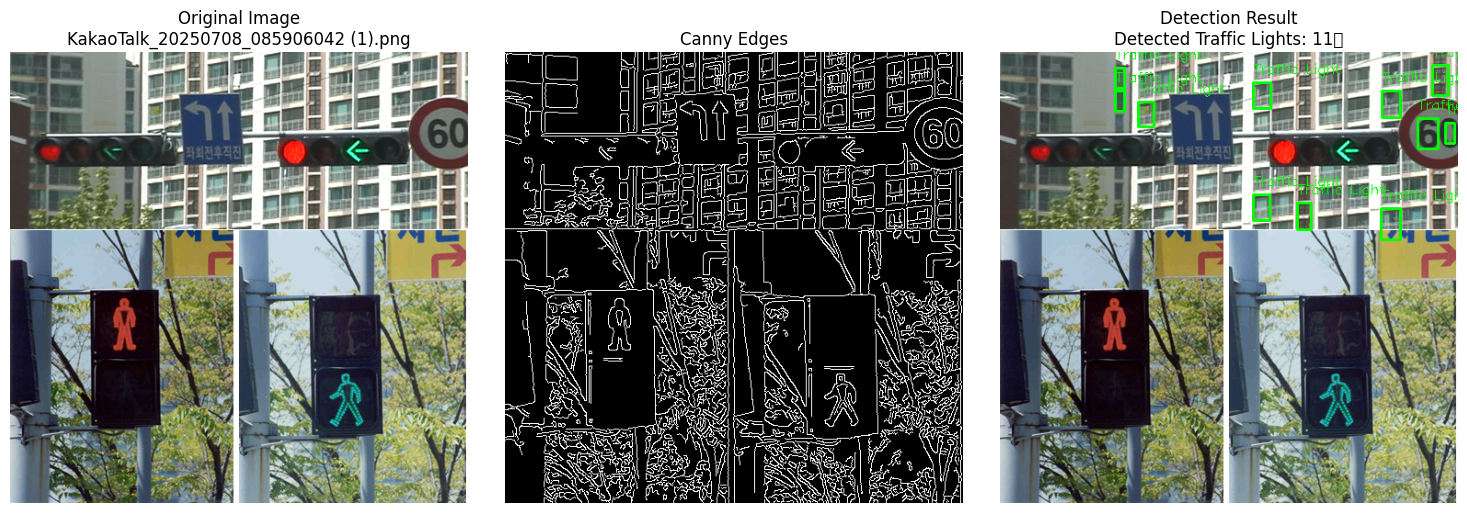

Í≤ÄÏ∂úÎêú Ïã†Ìò∏Îì± Í∞úÏàò: 11
  Ïã†Ìò∏Îì± 1: ÏúÑÏπò=(414, 170), ÌÅ¨Í∏∞=(21x34)
  Ïã†Ìò∏Îì± 2: ÏúÑÏπò=(323, 164), ÌÅ¨Í∏∞=(15x29)
  Ïã†Ìò∏Îì± 3: ÏúÑÏπò=(275, 155), ÌÅ¨Í∏∞=(18x28)
  Ïã†Ìò∏Îì± 4: ÏúÑÏπò=(484, 77), ÌÅ¨Í∏∞=(10x22)
  Ïã†Ìò∏Îì± 5: ÏúÑÏπò=(454, 72), ÌÅ¨Í∏∞=(22x33)
  Ïã†Ìò∏Îì± 6: ÏúÑÏπò=(150, 54), ÌÅ¨Í∏∞=(17x27)
  Ïã†Ìò∏Îì± 7: ÏúÑÏπò=(415, 42), ÌÅ¨Í∏∞=(20x29)
  Ïã†Ìò∏Îì± 8: ÏúÑÏπò=(125, 42), ÌÅ¨Í∏∞=(10x22)
  Ïã†Ìò∏Îì± 9: ÏúÑÏπò=(275, 33), ÌÅ¨Í∏∞=(19x28)
  Ïã†Ìò∏Îì± 10: ÏúÑÏπò=(125, 17), ÌÅ¨Í∏∞=(10x22)
  Ïã†Ìò∏Îì± 11: ÏúÑÏπò=(470, 14), ÌÅ¨Í∏∞=(17x33)


In [4]:
# 1.Í≤∞Í≥º Ïû°Îã§Ìïú Ïã†Ìò∏Îì± Ïù∏Ïãù ÏúóÏ™Ω 40ÌçºÏÑºÌä∏ Ï†ïÎèÑÎßå Í∞êÏßÄ Google ColabÏóêÏÑú Ïù¥ÎØ∏ÏßÄ ÏóÖÎ°úÎìúÌïòÏó¨ Ïã†Ìò∏Îì± Ïù∏ÏãùÌïòÍ∏∞
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

def detect_traffic_light_canny(image):
    """
    Canny Ïó£ÏßÄ Í≤ÄÏ∂úÎßåÏùÑ ÏÇ¨Ïö©Ìïú Ïã†Ìò∏Îì± Ïù∏Ïãù
    """
    # Í∑∏Î†àÏù¥Ïä§ÏºÄÏùº Î≥ÄÌôò
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Í∞ÄÏö∞ÏãúÏïà Î∏îÎü¨Î°ú ÎÖ∏Ïù¥Ï¶à Ï†úÍ±∞
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny Ïó£ÏßÄ Í≤ÄÏ∂ú
    edges = cv2.Canny(blurred, 50, 150)

    # Ïª®Ìà¨Ïñ¥ Ï∞æÍ∏∞
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    traffic_lights = []

    for contour in contours:
        # Ïª®Ìà¨Ïñ¥ Î©¥Ï†Å ÌïÑÌÑ∞ÎßÅ (ÎÑàÎ¨¥ ÏûëÍ±∞ÎÇò ÌÅ∞ Í≤É Ï†úÏô∏)
        area = cv2.contourArea(contour)
        if area < 100 or area > 5000:
            continue

        # Ïª®Ìà¨Ïñ¥Î•º ÎëòÎü¨Ïã∏Îäî ÏÇ¨Í∞ÅÌòï
        x, y, w, h = cv2.boundingRect(contour)

        # Ï¢ÖÌö°ÎπÑ Ï≤¥ÌÅ¨ (Ïã†Ìò∏Îì±ÏùÄ ÎåÄÎûµ ÏÑ∏Î°úÎ°ú Í∏¥ ÌòïÌÉú)
        aspect_ratio = float(w) / h
        if aspect_ratio > 0.8:  # ÎÑàÎ¨¥ Í∞ÄÎ°úÎ°ú Í∏¥ Í≤É Ï†úÏô∏
            continue

        # Ïª®Ìà¨Ïñ¥Ïùò ÎëòÎ†àÏôÄ Î©¥Ï†ÅÏúºÎ°ú ÏõêÌòïÏÑ± Ï≤¥ÌÅ¨
        perimeter = cv2.arcLength(contour, True)
        if perimeter == 0:
            continue

        circularity = 4 * np.pi * area / (perimeter * perimeter)

        # ÏõêÌòïÏóê Í∞ÄÍπåÏö¥ Í≤ÉÎì§Îßå ÏÑ†ÌÉù (Ïã†Ìò∏Îì±Ïùò Í∞Å Îì±ÏùÄ ÏõêÌòï)
        if circularity > 0.3:  # ÏûÑÍ≥ÑÍ∞í Ï°∞Ï†ï Í∞ÄÎä•
            traffic_lights.append((x, y, w, h))

    return traffic_lights, edges

def draw_detections(image, detections):
    """
    Í≤ÄÏ∂úÎêú Ïã†Ìò∏Îì± ÏòÅÏó≠ÏùÑ Ïù¥ÎØ∏ÏßÄÏóê Í∑∏Î¶¨Í∏∞
    """
    result = image.copy()
    for (x, y, w, h) in detections:
        cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(result, 'Traffic Light', (x, y-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    return result

def upload_and_detect():
    """
    ColabÏóêÏÑú Ïù¥ÎØ∏ÏßÄ ÏóÖÎ°úÎìúÌïòÍ≥† Ïã†Ìò∏Îì± Í≤ÄÏ∂ú
    """
    print("Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ ÏÑ†ÌÉùÌï¥Ï£ºÏÑ∏Ïöî...")
    uploaded = files.upload()

    for filename in uploaded.keys():
        print(f"\nÏ≤òÎ¶¨Ï§ë: {filename}")

        # ÏóÖÎ°úÎìúÎêú Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞
        image_data = uploaded[filename]
        image = Image.open(io.BytesIO(image_data))

        # PIL ImageÎ•º OpenCV ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
        image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

        # Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Ï°∞Ï†ï (ÎÑàÎ¨¥ ÌÅ¨Î©¥ Ï≤òÎ¶¨ ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶º)
        height, width = image_cv.shape[:2]
        if width > 800:
            ratio = 800 / width
            new_width = 800
            new_height = int(height * ratio)
            image_cv = cv2.resize(image_cv, (new_width, new_height))

        # Ïã†Ìò∏Îì± Í≤ÄÏ∂ú
        detections, edges = detect_traffic_light_canny(image_cv)

        # Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
        result_image = draw_detections(image_cv, detections)

        # Í≤∞Í≥º ÏãúÍ∞ÅÌôî (matplotlib ÏÇ¨Ïö©)
        plt.figure(figsize=(15, 5))

        # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
        plt.title(f'Original Image\n{filename}')
        plt.axis('off')

        # Canny Ïó£ÏßÄ
        plt.subplot(1, 3, 2)
        plt.imshow(edges, cmap='gray')
        plt.title('Canny Edges')
        plt.axis('off')

        # Í≤ÄÏ∂ú Í≤∞Í≥º
        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Detection Result\nDetected Traffic Lights: {len(detections)}Í∞ú')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        # Í≤ÄÏ∂ú Ï†ïÎ≥¥ Ï∂úÎ†•
        print(f"Í≤ÄÏ∂úÎêú Ïã†Ìò∏Îì± Í∞úÏàò: {len(detections)}")
        for i, (x, y, w, h) in enumerate(detections):
            print(f"  Ïã†Ìò∏Îì± {i+1}: ÏúÑÏπò=({x}, {y}), ÌÅ¨Í∏∞=({w}x{h})")

def adjust_parameters_and_test():
    """
    ÌååÎùºÎØ∏ÌÑ∞Î•º Ï°∞Ï†ïÌïòÎ©¥ÏÑú ÌÖåÏä§Ìä∏Ìï† Ïàò ÏûàÎäî Ìï®Ïàò
    """
    print("Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ ÏÑ†ÌÉùÌï¥Ï£ºÏÑ∏Ïöî...")
    uploaded = files.upload()

    # Ï≤´ Î≤àÏß∏ ÏóÖÎ°úÎìúÎêú Ïù¥ÎØ∏ÏßÄÎßå ÏÇ¨Ïö©
    filename = list(uploaded.keys())[0]
    image_data = uploaded[filename]
    image = Image.open(io.BytesIO(image_data))
    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Ï°∞Ï†ï
    height, width = image_cv.shape[:2]
    if width > 800:
        ratio = 800 / width
        new_width = 800
        new_height = int(height * ratio)
        image_cv = cv2.resize(image_cv, (new_width, new_height))

    # Îã§ÏñëÌïú ÌååÎùºÎØ∏ÌÑ∞Î°ú ÌÖåÏä§Ìä∏
    test_params = [
        {"canny_low": 30, "canny_high": 100, "min_area": 50, "max_area": 3000, "circularity": 0.2},
        {"canny_low": 50, "canny_high": 150, "min_area": 100, "max_area": 5000, "circularity": 0.3},
        {"canny_low": 70, "canny_high": 200, "min_area": 200, "max_area": 8000, "circularity": 0.4}
    ]

    plt.figure(figsize=(20, 12))

    for i, params in enumerate(test_params):
        # Í∑∏Î†àÏù¥Ïä§ÏºÄÏùº Î≥ÄÌôò
        gray = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Canny Ïó£ÏßÄ Í≤ÄÏ∂ú (ÌååÎùºÎØ∏ÌÑ∞ Î≥ÄÍ≤Ω)
        edges = cv2.Canny(blurred, params["canny_low"], params["canny_high"])

        # Ïª®Ìà¨Ïñ¥ Ï∞æÍ∏∞
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        traffic_lights = []
        for contour in contours:
            area = cv2.contourArea(contour)
            if area < params["min_area"] or area > params["max_area"]:
                continue

            x, y, w, h = cv2.boundingRect(contour)
            aspect_ratio = float(w) / h
            if aspect_ratio > 0.8:
                continue

            perimeter = cv2.arcLength(contour, True)
            if perimeter == 0:
                continue

            circularity = 4 * np.pi * area / (perimeter * perimeter)
            if circularity > params["circularity"]:
                traffic_lights.append((x, y, w, h))

        # Í≤∞Í≥º Í∑∏Î¶¨Í∏∞
        result = draw_detections(image_cv, traffic_lights)

        # ÏãúÍ∞ÅÌôî
        plt.subplot(3, 3, i*3 + 1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
        plt.title(f'Original (Test {i+1})')
        plt.axis('off')

        plt.subplot(3, 3, i*3 + 2)
        plt.imshow(edges, cmap='gray')
        plt.title(f'Canny {params["canny_low"]}-{params["canny_high"]}')
        plt.axis('off')

        plt.subplot(3, 3, i*3 + 3)
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title(f'Result: {len(traffic_lights)}Í∞ú Í≤ÄÏ∂ú')
        plt.axis('off')

        print(f"Test {i+1} - ÌååÎùºÎØ∏ÌÑ∞: {params}")
        print(f"  Detected Traffic Lights: {len(traffic_lights)}\n")

    plt.tight_layout()
    plt.show()

# Ïã§Ìñâ Ìï®ÏàòÎì§
print("=== Google Colab Ïã†Ìò∏Îì± Ïù∏Ïãù ÌÖåÏä§Ìä∏ ===")
print("1. upload_and_detect() - Í∏∞Î≥∏ Í≤ÄÏ∂ú")
print("2. adjust_parameters_and_test() - ÌååÎùºÎØ∏ÌÑ∞ ÎπÑÍµê ÌÖåÏä§Ìä∏")
print("\nÏÇ¨Ïö©Î≤ï:")
print("upload_and_detect()  # Ïù¥ Ìï®ÏàòÎ•º Ïã§ÌñâÌïòÏÑ∏Ïöî")

# Î∞îÎ°ú Ïã§ÌñâÌïòÎ†§Î©¥ ÏïÑÎûò Ï£ºÏÑùÏùÑ Ìï¥Ï†úÌïòÏÑ∏Ïöî
upload_and_detect()
def draw_detections(image, detections, draw_grid=True, grid_rows=10):
    """
   Í∞ÄÎ°ú Í≤©ÏûêÏôÄ Î≤àÌò∏Î•º Ï∂îÍ∞Ä
    """
    result = image.copy()
    height, width = result.shape[:2]

    # üü¶ Í≤©Ïûê Ï∂îÍ∞Ä
    if draw_grid:
        row_height = height // grid_rows
        for i in range(grid_rows):
            y = i * row_height
            # Í∞ÄÎ°úÏÑ†
            cv2.line(result, (0, y), (width, y), (200, 200, 200), 1)

            # Î≤àÌò∏ ÌëúÍ∏∞ (ÏôºÏ™Ω ÏúÑ)
            label = str(i)
            cv2.putText(result, label, (10, y + 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)

        # ÎßàÏßÄÎßâ ÏÑ† (ÌïòÎã®)
        cv2.line(result, (0, height - 1), (width, height - 1), (200, 200, 200), 1)
        cv2.putText(result, str(grid_rows), (10, height - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)

    # üü© Ïã†Ìò∏Îì± ÏúÑÏπò ÌëúÏãú
    for i, (x, y, w, h) in enumerate(detections):
        cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(result, f'Traffic Light {i+1}', (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    return result

üö¶ Í∞úÏÑ†Îêú Ïã†Ìò∏Îì± Ïù∏Ïãù ÌîÑÎ°úÍ∑∏Îû®

üéØ Ïã§Ìñâ ÏòµÏÖòÏùÑ ÏÑ†ÌÉùÌïòÏÑ∏Ïöî:

1Ô∏è‚É£ upload_and_detect()          - ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ + Canny
2Ô∏è‚É£ upload_multiple_images()     - Ïó¨Îü¨ ÏÇ¨ÏßÑ Ïó∞ÏÜç ÌÖåÏä§Ìä∏
3Ô∏è‚É£ adjust_parameters_and_test() - ÌååÎùºÎØ∏ÌÑ∞ ÎπÑÍµê ÌÖåÏä§Ìä∏
4Ô∏è‚É£ compare_with_without_color()  - ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ Ìö®Í≥º ÎπÑÍµê

üîß Ï£ºÏöî Í∞úÏÑ† ÏÇ¨Ìï≠:
   - üé® ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ Ï∂îÍ∞Ä: Îπ®Í∞ï/ÎÖ∏Îûë/Ï¥àÎ°ù/ÌååÎûë Ïã†Ìò∏Îì± ÏÉâÏÉÅÎßå Í≤ÄÏ∂ú
   - Î©¥Ï†Å Î≤îÏúÑ: 100~8000 (ÏµúÏ†ÅÌôî)
   - Canny ÏûÑÍ≥ÑÍ∞í: 30-120
   - ÏõêÌòïÏÑ± Í∏∞Ï§Ä: 0.25
   - ÏúÑÏπò ÌïÑÌÑ∞ÎßÅ: ÌïòÎã® 30% Ï†úÏô∏
   - Ï¢ÖÌö°ÎπÑ: 0.8 Ïù¥Ìïò
   - Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞: ÏµúÎåÄ 1200px

üí° Ï∂îÏ≤ú ÏàúÏÑú:
   1. compare_with_without_color() - ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ Ìö®Í≥º ÌôïÏù∏
   2. upload_multiple_images() - Ïó¨Îü¨ ÏÇ¨ÏßÑÏúºÎ°ú ÌÖåÏä§Ìä∏

üöÄ Ïã†Ìò∏Îì± Ïù∏Ïãù ÌîÑÎ°úÍ∑∏Îû® ÏãúÏûë! (Í∞úÏÑ†Îêú Î≤ÑÏ†Ñ)
üìÅ Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ ÏÑ†ÌÉùÌï¥Ï£ºÏÑ∏Ïöî...


Saving KakaoTalk_20250708_085906042.png to KakaoTalk_20250708_085906042 (2).png

üñºÔ∏è  ÌååÏùº Ï≤òÎ¶¨ ÏãúÏûë: KakaoTalk_20250708_085906042 (2).png
Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞: 498 x 491 ÌîΩÏÖÄ

üîç Ïã†Ìò∏Îì± Í≤ÄÏ∂ú ÏãúÏûë... (ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ + Canny)
Step 0: Ïã†Ìò∏Îì± ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏãúÏûë...
Step 0: ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏôÑÎ£å (Îπ®Í∞ï/ÎÖ∏Îûë/Ï¥àÎ°ù/ÌååÎûë ÏòÅÏó≠Îßå Ï∂îÏ∂ú)
Step 2: ÎÖ∏Ïù¥Ï¶à Ï†úÍ±∞ ÏôÑÎ£å
Step 3: Ïó£ÏßÄ Í≤ÄÏ∂ú ÏôÑÎ£å (ÏûÑÍ≥ÑÍ∞í: 30-120)
Step 4: 500Í∞úÏùò Ïú§Í≥ΩÏÑ† Î∞úÍ≤¨
  Ïú§Í≥ΩÏÑ† 1 Í≤ÄÏÇ¨ Ï§ë...
    ‚ùå ÎÑàÎ¨¥ ÏûëÏùå (Î©¥Ï†Å: 3.5, ÏµúÏÜå: 120)
  Ïú§Í≥ΩÏÑ† 2 Í≤ÄÏÇ¨ Ï§ë...
    ‚ùå ÎÑàÎ¨¥ ÏûëÏùå (Î©¥Ï†Å: 2.0, ÏµúÏÜå: 120)
  Ïú§Í≥ΩÏÑ† 3 Í≤ÄÏÇ¨ Ï§ë...
    ‚ùå ÎÑàÎ¨¥ ÏûëÏùå (Î©¥Ï†Å: 0.0, ÏµúÏÜå: 120)
  Ïú§Í≥ΩÏÑ† 4 Í≤ÄÏÇ¨ Ï§ë...
    ‚ùå ÎÑàÎ¨¥ ÏûëÏùå (Î©¥Ï†Å: 0.0, ÏµúÏÜå: 120)
  Ïú§Í≥ΩÏÑ† 5 Í≤ÄÏÇ¨ Ï§ë...
    ‚ùå ÎÑàÎ¨¥ ÏûëÏùå (Î©¥Ï†Å: 2.0, ÏµúÏÜå: 120)
  Ïú§Í≥ΩÏÑ† 6 Í≤ÄÏÇ¨ Ï§ë...
    ‚ùå ÎÑàÎ¨¥ ÏûëÏùå (Î©¥Ï†Å: 1.0, ÏµúÏÜå: 120)
  Ïú§Í≥ΩÏÑ† 7 Í≤ÄÏÇ¨ Ï§ë...
    ‚ùå ÎÑàÎ¨¥ ÏûëÏùå (Î©¥

/tmp/ipython-input-5-1383574743.py:384: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1383574743.py:384: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1383574743.py:384: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1383574743.py:384: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1383574743.py:384: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1383574743.py:384: UserWarning: Glyph 50659 (\N{HANGUL SYLLABLE ES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1383574743.py:384: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from font(s) DejaVu Sans.
  

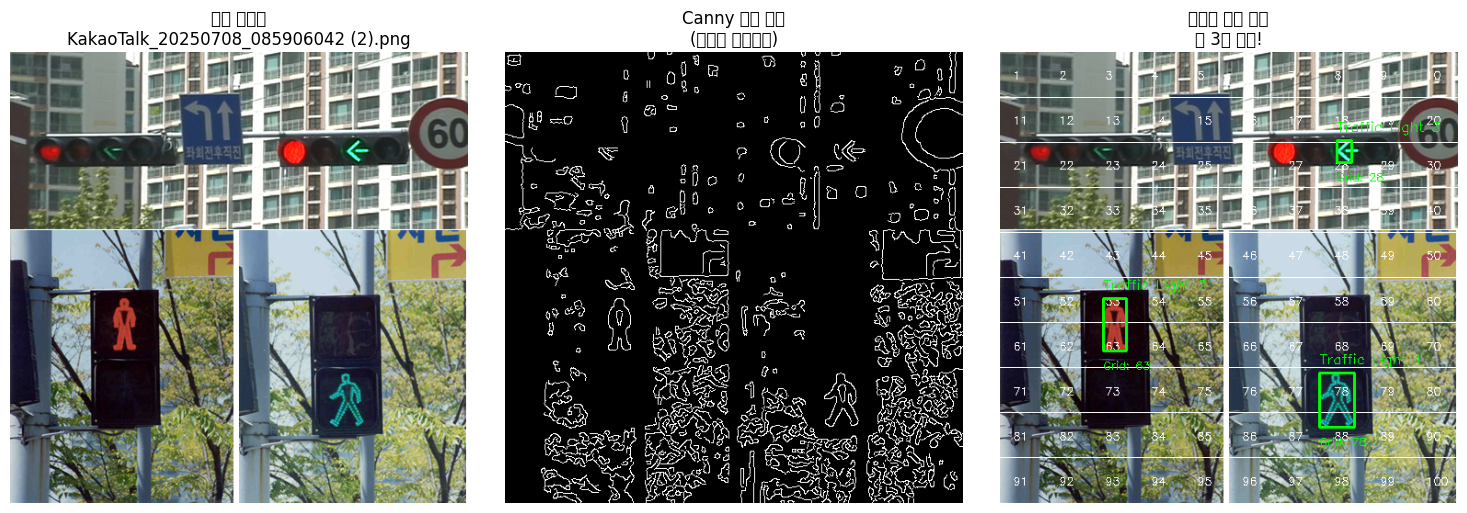


üìã ÏµúÏ¢Ö Í≤∞Í≥º:
   Í≤ÄÏ∂úÎêú Ïã†Ìò∏Îì± Í∞úÏàò: 3Í∞ú
   üö¶ Ïã†Ìò∏Îì± 1: ÏúÑÏπò=(347, 349), ÌÅ¨Í∏∞=(38 x 59)
   üö¶ Ïã†Ìò∏Îì± 2: ÏúÑÏπò=(112, 268), ÌÅ¨Í∏∞=(25 x 57)
   üö¶ Ïã†Ìò∏Îì± 3: ÏúÑÏπò=(366, 96), ÌÅ¨Í∏∞=(16 x 24)


In [5]:
# ============================================
# 3 Ï¥àÎ≥¥ÏûêÎ•º ÏúÑÌïú Ïã†Ìò∏Îì± Ïù∏Ïãù ÏΩîÎìú ÏÉÅÏÑ∏ ÏÑ§Î™Ö
# ============================================

# 1. ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Îì§ Í∞ÄÏ†∏Ïò§Í∏∞
import cv2          # Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†Ñ ÎùºÏù¥Î∏åÎü¨Î¶¨ (Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨Ïö©)
import numpy as np  # Ïà´Ïûê Í≥ÑÏÇ∞Ïö© ÎùºÏù¥Î∏åÎü¨Î¶¨
import matplotlib.pyplot as plt  # Í∑∏ÎûòÌîÑ/Ïù¥ÎØ∏ÏßÄ ÌëúÏãúÏö©
from google.colab import files   # ÏΩîÎû©ÏóêÏÑú ÌååÏùº ÏóÖÎ°úÎìúÏö©
from PIL import Image           # Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏùΩÍ∏∞Ïö©
import io                      # ÌååÏùº ÏûÖÏ∂úÎ†•Ïö©

# ============================================
# Î©îÏù∏ Ìï®Ïàò 1: Ïã†Ìò∏Îì± Ï∞æÎäî Ìï®Ïàò (ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ + Canny)
# ============================================
def detect_traffic_light_canny(image, min_area=100, max_area=8000, canny_low=30, canny_high=120, circularity_threshold=0.25, use_color_filter=True):
    """
    Ïù¥ Ìï®ÏàòÎäî ÏÇ¨ÏßÑÏóêÏÑú Ïã†Ìò∏Îì±ÏùÑ Ï∞æÎäî Ìï®ÏàòÏûÖÎãàÎã§ (ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ + Canny)
    ÏûÖÎ†•: Ïª¨Îü¨ ÏÇ¨ÏßÑ, ÏµúÏÜåÎ©¥Ï†Å, ÏµúÎåÄÎ©¥Ï†Å, Canny ÏûÑÍ≥ÑÍ∞íÎì§, ÏõêÌòïÏÑ± Í∏∞Ï§Ä, ÏÉâÏÉÅÌïÑÌÑ∞ ÏÇ¨Ïö©Ïó¨Î∂Ä
    Ï∂úÎ†•: Ïã†Ìò∏Îì± ÏúÑÏπòÎì§, Ïó£ÏßÄ Ïù¥ÎØ∏ÏßÄ
    """

    # üî¥ NEW Step: ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ (Ïã†Ìò∏Îì± ÏÉâÏÉÅÎßå Ï∞æÍ∏∞)
    if use_color_filter:
        print("Step 0: Ïã†Ìò∏Îì± ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏãúÏûë...")

        # HSV ÏÉâÍ≥µÍ∞ÑÏúºÎ°ú Î≥ÄÌôò (ÏÉâÏÉÅ Í≤ÄÏ∂úÏóê Îçî Ï¢ãÏùå)
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Îπ®Í∞ïÏÉâ Î≤îÏúÑ (Ïã†Ìò∏Îì± Îπ®Í∞ÑÎ∂à)
        red_lower1 = np.array([0, 30, 30]) # 20ÏóêÏÑú 30ÏúºÎ°ú
        red_upper1 = np.array([15, 255, 255]) #10ÏóêÏÑú 15
        red_lower2 = np.array([165, 30, 30]) #165Î°ú 30ÏúºÎ°ú
        red_upper2 = np.array([180, 255, 255])
        red_lower3 = np.array([1, 20, 20]) #Ìï¥Îãπ Í∞íÏúºÎ°ú ÏàòÏ†ïÌï®
        red_upper3 = np.array([10, 255, 150]) #Ìï¥Îãπ Í∞íÏúºÎ°ú ÏàòÏ†ïÌï®
        red_lower4 = np.array([170, 50, 100]) #Ï∂îÍ∞ÄÌï®
        red_upper4 = np.array([180, 255, 255]) #Ï∂îÍ∞ÄÌï®

        # ÎÖ∏ÎûëÏÉâ Î≤îÏúÑ (Ïã†Ìò∏Îì± ÎÖ∏ÎûÄÎ∂à)
        yellow_lower = np.array([20, 50, 50])
        yellow_upper = np.array([30, 255, 255])
        yellow_mask = cv2.inRange(hsv, yellow_lower, yellow_upper)
        # Ï¥àÎ°ùÏÉâ Î≤îÏúÑ (Ïã†Ìò∏Îì± Ï¥àÎ°ùÎ∂à)
        green_lower = np.array([40, 50, 50])
        green_upper = np.array([80, 255, 255])
        green_mask = cv2.inRange(hsv, green_lower, green_upper)
        # ÌååÎûÄÏÉâ/Ï≤≠Î°ùÏÉâ Î≤îÏúÑ (Î≥¥ÌñâÏûê Ïã†Ìò∏Îì± ÌååÎûÄÎ∂à) üÜï Ï∂îÍ∞Ä!
        blue_lower = np.array([80, 50, 50])
        blue_upper = np.array([100, 255, 255])
        blue_mask = cv2.inRange(hsv, blue_lower, blue_upper)
        # Í∞Å ÏÉâÏÉÅ ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
        red_mask1 = cv2.inRange(hsv, red_lower1, red_upper1)
        red_mask2 = cv2.inRange(hsv, red_lower2, red_upper2)
        red_mask3 = cv2.inRange(hsv, red_lower3, red_upper3)
        red_mask = cv2.bitwise_or(red_mask1, red_mask2)

        yellow_mask = cv2.inRange(hsv, yellow_lower, yellow_upper)
        green_mask = cv2.inRange(hsv, green_lower, green_upper)
        blue_mask = cv2.inRange(hsv, blue_lower, blue_upper)  # üÜï ÌååÎûÄÏÉâ ÎßàÏä§ÌÅ¨ Ï∂îÍ∞Ä!
        red_mask3 = cv2.inRange(hsv, red_lower3, red_upper3)
        red_mask = cv2.bitwise_or(cv2.bitwise_or(red_mask1, red_mask2), red_mask3)

        # Î™®Îì† Ïã†Ìò∏Îì± ÏÉâÏÉÅ ÎßàÏä§ÌÅ¨ Ìï©ÏπòÍ∏∞ (ÌååÎûÄÏÉâ Ìè¨Ìï®)
        traffic_light_mask = red_mask
       # traffic_light_mask = cv2.bitwise_or(red_mask, yellow_mask)
        traffic_light_mask = cv2.bitwise_or(traffic_light_mask, yellow_mask)
        traffic_light_mask = cv2.bitwise_or(traffic_light_mask, green_mask)
        traffic_light_mask = cv2.bitwise_or(traffic_light_mask, blue_mask)  # üÜï ÌååÎûÄÏÉâÎèÑ Ï∂îÍ∞Ä!

        # ÎßàÏä§ÌÅ¨Î•º ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ï†ÅÏö©
        color_filtered = cv2.bitwise_and(image, image, mask=traffic_light_mask)

        # ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅÎêú Ïù¥ÎØ∏ÏßÄÎ•º ÌùëÎ∞±ÏúºÎ°ú Î≥ÄÌôò
        gray = cv2.cvtColor(color_filtered, cv2.COLOR_BGR2GRAY)
        print("Step 0: ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏôÑÎ£å (Îπ®Í∞ï/ÎÖ∏Îûë/Ï¥àÎ°ù/ÌååÎûë ÏòÅÏó≠Îßå Ï∂îÏ∂ú)")
    else:
        # ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏóÜÏù¥ Î∞îÎ°ú ÌùëÎ∞± Î≥ÄÌôò
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Step 1: Ïª¨Îü¨ ‚Üí ÌùëÎ∞± Î≥ÄÌôò ÏôÑÎ£å (ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏóÜÏùå)")

    # üü° Step 2: Ïù¥ÎØ∏ÏßÄÎ•º Î∂ÄÎìúÎüΩÍ≤å ÎßåÎì§Í∏∞ (ÎÖ∏Ïù¥Ï¶à Ï†úÍ±∞)
    blurred = cv2.GaussianBlur(gray, (9, 9), 0) #9Î°ú 3ÏùÄ Ïã†Ìò∏Îì± Îëê Í∞úÎäî Ïù∏ÏãùÌïòÏßÄ Î™ªÌïòÍ≥† 5Îäî ÌïòÎÇòÎßå Ïù∏Ïãù 9Î°úÌïòÎ©¥ ÏÑ∏Í∞úÏù∏Ïãù
    print("Step 2: ÎÖ∏Ïù¥Ï¶à Ï†úÍ±∞ ÏôÑÎ£å")

    # üü° Step 3: Canny Ïó£ÏßÄ Í≤ÄÏ∂ú (ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ïÎê®!)
    edges = cv2.Canny(blurred, canny_low, canny_high)  # Ï°∞Ï†ï Í∞ÄÎä•Ìïú Í∞íÎì§
    print(f"Step 3: Ïó£ÏßÄ Í≤ÄÏ∂ú ÏôÑÎ£å (ÏûÑÍ≥ÑÍ∞í: {canny_low}-{canny_high})")

    # üü° Step 4: Ïó£ÏßÄÎì§Î°ú Ïú§Í≥ΩÏÑ†(Ïª®Ìà¨Ïñ¥) Ï∞æÍ∏∞
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print(f"Step 4: {len(contours)}Í∞úÏùò Ïú§Í≥ΩÏÑ† Î∞úÍ≤¨")

    # üü° Step 5: Ï∞æÏùÄ Ïú§Í≥ΩÏÑ†Îì§ Ï§ëÏóêÏÑú Ïã†Ìò∏Îì± Í∞ôÏùÄ Í≤ÉÎßå Í≥®ÎùºÎÇ¥Í∏∞
    traffic_lights = []
    image_height = image.shape[0]  # Ïù¥ÎØ∏ÏßÄ ÎÜíÏù¥ Íµ¨ÌïòÍ∏∞

    for i, contour in enumerate(contours):
        print(f"  Ïú§Í≥ΩÏÑ† {i+1} Í≤ÄÏÇ¨ Ï§ë...")

        # üìè ÌÅ¨Í∏∞ Ï≤¥ÌÅ¨: Ï°∞Ï†ïÎêú Î©¥Ï†Å Î≤îÏúÑ ÏÇ¨Ïö©
        area = cv2.contourArea(contour)
        if area < min_area:  # Ï°∞Ï†ï Í∞ÄÎä•Ìïú ÏµúÏÜå Î©¥Ï†Å
            print(f"    ‚ùå ÎÑàÎ¨¥ ÏûëÏùå (Î©¥Ï†Å: {area}, ÏµúÏÜå: {min_area})")
            continue
        if area > max_area:  # Ï°∞Ï†ï Í∞ÄÎä•Ìïú ÏµúÎåÄ Î©¥Ï†Å
            print(f"    ‚ùå ÎÑàÎ¨¥ ÌÅº (Î©¥Ï†Å: {area}, ÏµúÎåÄ: {max_area})")
            continue

        # üìê Ïú§Í≥ΩÏÑ†ÏùÑ ÎëòÎü¨Ïã∏Îäî ÏÇ¨Í∞ÅÌòï Íµ¨ÌïòÍ∏∞
        x, y, w, h = cv2.boundingRect(contour)
       # ÏúÑÏπòÌïÑÌÑ∞ÎßÅ Ï∂îÍ∞Ä
        # üÜï ÏúÑÏπò ÌïÑÌÑ∞ÎßÅ: Ïã†Ìò∏Îì±ÏùÄ Î≥¥ÌÜµ Ïù¥ÎØ∏ÏßÄ ÏÉÅÎã®Ïóê ÏûàÏùå
        if y > image_height * 0.8:  # Ïù¥ÎØ∏ÏßÄ ÌïòÎã® 30%Ïóê ÏûàÏúºÎ©¥ Ï†úÏô∏ #0.7>0.8
            print(f"    ‚ùå ÎÑàÎ¨¥ ÏïÑÎûòÏ™Ω (y: {y}, Ïù¥ÎØ∏ÏßÄ ÎÜíÏù¥Ïùò {y/image_height*100:.1f}%)")
            continue

        # üìè Í∞ÄÎ°úÏÑ∏Î°ú ÎπÑÏú® Ï≤¥ÌÅ¨: Ïã†Ìò∏Îì±ÏùÄ ÏÑ∏Î°úÍ∞Ä Îçî ÍπÄ
        aspect_ratio = float(w) / h
        if aspect_ratio > 0.7: #0.8>0.7, 0.6ÏùÄ Í∞êÏßÄ ÏïÑÎ¨¥Í≤ÉÎèÑ Î™ªÌï®
            print(f"    ‚ùå ÎÑàÎ¨¥ Í∞ÄÎ°úÎ°ú ÍπÄ (ÎπÑÏú®: {aspect_ratio:.2f})")
            continue

        # üîµ ÏõêÌòïÏÑ± Ï≤¥ÌÅ¨: Ï°∞Ï†ïÎêú Í∏∞Ï§Ä ÏÇ¨Ïö©
        perimeter = cv2.arcLength(contour, True)
        if perimeter == 0:
            continue

        circularity = 4 * np.pi * area / (perimeter * perimeter) #Í±¥Îì§Ïù¥ÏßÄ ÎßêÍ≤É, 3ÏúºÎ°úÎëêÎ©¥ ÏïÑÎ¨¥Í≤ÉÎèÑ Ïù∏ÏãùÌïòÏßÄ Î™ªÌïòÍ≥† 5Î°ú ÎëêÎ©¥ Ïû°ÎèôÏÇ¨ÎãàÍ∞Ä Ïù∏ÏãùÎê®

        if circularity > circularity_threshold:  # Ï°∞Ï†ï Í∞ÄÎä•Ìïú ÏõêÌòïÏÑ± Í∏∞Ï§Ä
            print(f"    ‚úÖ Ïã†Ìò∏Îì± ÌõÑÎ≥¥ Î∞úÍ≤¨! (Î©¥Ï†Å: {area}, ÎπÑÏú®: {aspect_ratio:.2f}, ÏõêÌòïÏÑ±: {circularity:.2f}, ÏúÑÏπò: y={y})")
            traffic_lights.append((x, y, w, h))
        else:
            print(f"    ‚ùå ÏõêÌòïÏù¥ ÏïÑÎãò (ÏõêÌòïÏÑ±: {circularity:.2f}, Í∏∞Ï§Ä: {circularity_threshold})")

    print(f"ÏµúÏ¢Ö Í≤∞Í≥º: {len(traffic_lights)}Í∞úÏùò Ïã†Ìò∏Îì± Î∞úÍ≤¨!")
    return traffic_lights, edges

# ============================================
# Î©îÏù∏ Ìï®Ïàò 2: Í≤∞Í≥ºÎ•º Í∑∏Î¶ºÏúºÎ°ú Í∑∏Î¶¨Îäî Ìï®Ïàò
# ============================================
def draw_detections(image, detections):
    """
    Ï∞æÏùÄ Ïã†Ìò∏Îì± ÏúÑÏπòÏóê Ï¥àÎ°ùÏÉâ ÏÇ¨Í∞ÅÌòïÏùÑ Í∑∏Î¶¨Îäî Ìï®Ïàò
    """
    result = image.copy()

    for i, (x, y, w, h) in enumerate(detections):
        cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(result, f'Traffic Light {i+1}', (x, y-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    return result

# ============================================
# üÜï ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÎπÑÍµê ÌÖåÏä§Ìä∏ Ìï®Ïàò
# ============================================
def compare_with_without_color():
    """
    ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏûàÏùÑ Îïå vs ÏóÜÏùÑ Îïå ÎπÑÍµê
    """
    print("üé® ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÎπÑÍµê ÌÖåÏä§Ìä∏!")
    print("üìÅ Ïã†Ìò∏Îì± ÏÇ¨ÏßÑÏùÑ ÏÑ†ÌÉùÌïòÏÑ∏Ïöî...")

    uploaded = files.upload()
    filename = list(uploaded.keys())[0]

    # Ïù¥ÎØ∏ÏßÄ Î°úÎìú
    image_data = uploaded[filename]
    image = Image.open(io.BytesIO(image_data))
    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # ÌÅ¨Í∏∞ Ï°∞Ï†ï
    height, width = image_cv.shape[:2]
    if width > 1000:
        ratio = 1000 / width
        image_cv = cv2.resize(image_cv, (1000, int(height * ratio)))

    # 1. ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏóÜÏù¥ Í≤ÄÏ∂ú
    print("\nüîç ÌÖåÏä§Ìä∏ 1: ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏóÜÏù¥")
    detections1, edges1 = detect_traffic_light_canny(
        image_cv,
        min_area=120, max_area=8000, #####
        canny_low=30, canny_high=120,
        circularity_threshold=0.25,
        use_color_filter=False  # ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏÇ¨Ïö© ÏïàÌï®
    )

    # 2. ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏÇ¨Ïö©Ìï¥ÏÑú Í≤ÄÏ∂ú
    print("\nüîç ÌÖåÏä§Ìä∏ 2: ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏÇ¨Ïö©")
    detections2, edges2 = detect_traffic_light_canny(
        image_cv,
        min_area=100, max_area=8000,
        canny_low=30, canny_high=120,
        circularity_threshold=0.25,
        use_color_filter=True   # ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏÇ¨Ïö©!
    )

    # Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
    result1 = draw_detections(image_cv, detections1)
    result2 = draw_detections(image_cv, detections2)

    # ÎπÑÍµê Í≤∞Í≥º ÌëúÏãú
    plt.figure(figsize=(20, 10))

    # Ï≤´ Î≤àÏß∏ Ï§Ñ: ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏóÜÎäî Í≤ΩÏö∞
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
    plt.title(f'ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ\n{filename}')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(edges1, cmap='gray')
    plt.title('CannyÎßå ÏÇ¨Ïö©\n(ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏóÜÏùå)')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
    plt.title(f'Í≤∞Í≥º: {len(detections1)}Í∞ú Í≤ÄÏ∂ú\n(ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏóÜÏùå)')
    plt.axis('off')

    # Îëê Î≤àÏß∏ Ï§Ñ: ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏûàÎäî Í≤ΩÏö∞
    plt.subplot(2, 3, 4)
    plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
    plt.title('ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(edges2, cmap='gray')
    plt.title('ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ + Canny\n(Îπ®Í∞ï/ÎÖ∏Îûë/Ï¥àÎ°ùÎßå)')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
    plt.title(f'Í≤∞Í≥º: {len(detections2)}Í∞ú Í≤ÄÏ∂ú\n(ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ Ï†ÅÏö©)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Í≤∞Í≥º ÎπÑÍµê
    print(f"\nüìä Í≤∞Í≥º ÎπÑÍµê:")
    print(f"   ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏóÜÏùå: {len(detections1)}Í∞ú Í≤ÄÏ∂ú")
    print(f"   ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ Ï†ÅÏö©: {len(detections2)}Í∞ú Í≤ÄÏ∂ú")

    if len(detections2) > 0 and len(detections2) <= len(detections1):
        print("   ‚úÖ ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅÏù¥ Îçî Ï†ïÌôïÌïú Í≤∞Í≥ºÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§!")
    elif len(detections2) > len(detections1):
        print("   üìà ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅÏúºÎ°ú Îçî ÎßéÏùÄ Ïã†Ìò∏Îì±ÏùÑ Ï∞æÏïòÏäµÎãàÎã§!")
    else:
        print("   ü§î Îëê Î∞©Î≤ï Î™®Îëê Ïã†Ìò∏Îì±ÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§. Îã§Î•∏ ÏÇ¨ÏßÑÏùÑ ÏãúÎèÑÌï¥Î≥¥ÏÑ∏Ïöî.")
def adjust_parameters_and_test():
    """
    Îã§ÏñëÌïú ÌååÎùºÎØ∏ÌÑ∞Î°ú ÌÖåÏä§Ìä∏Ìï¥ÏÑú ÏµúÏ†ÅÍ∞í Ï∞æÍ∏∞
    """
    print("üîß ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï ÌÖåÏä§Ìä∏ Î™®Îìú!")
    print("üìÅ Ïã†Ìò∏Îì±Ïù¥ ÏûàÎäî Ïù¥ÎØ∏ÏßÄÎ•º ÏÑ†ÌÉùÌïòÏÑ∏Ïöî...")

    uploaded = files.upload()
    filename = list(uploaded.keys())[0]

    # Ïù¥ÎØ∏ÏßÄ Î°úÎìú
    image_data = uploaded[filename]
    image = Image.open(io.BytesIO(image_data))
    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # ÌÅ¨Í∏∞ Ï°∞Ï†ï
    height, width = image_cv.shape[:2]
    if width > 1000:
        ratio = 1000 / width
        image_cv = cv2.resize(image_cv, (1000, int(height * ratio)))

    # Îã§ÏñëÌïú ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï© ÌÖåÏä§Ìä∏
    param_sets = [
        {"name": "Í∏∞Î≥∏Í∞í", "min_area": 100, "max_area": 5000, "canny_low": 50, "canny_high": 150, "circularity": 0.3},
        {"name": "Îçî ÎØºÍ∞êÌïòÍ≤å", "min_area": 50, "max_area": 10000, "canny_low": 30, "canny_high": 120, "circularity": 0.2},
        {"name": "Îçî ÏóÑÍ≤©ÌïòÍ≤å", "min_area": 200, "max_area": 8000, "canny_low": 70, "canny_high": 200, "circularity": 0.4},
        {"name": "ÌÅ∞ Ïã†Ìò∏Îì±Ïö©", "min_area": 500, "max_area": 15000, "canny_low": 40, "canny_high": 160, "circularity": 0.25}
    ]

    plt.figure(figsize=(20, 15))

    for i, params in enumerate(param_sets):
        print(f"\nüß™ ÌÖåÏä§Ìä∏ {i+1}: {params['name']}")

        # Ïã†Ìò∏Îì± Í≤ÄÏ∂ú
        detections, edges = detect_traffic_light_canny(
            image_cv,
            min_area=params["min_area"],
            max_area=params["max_area"],
            canny_low=params["canny_low"],
            canny_high=params["canny_high"],
            circularity_threshold=params["circularity"]
        )

        result_image = draw_detections(image_cv, detections)

        # Í≤∞Í≥º ÌëúÏãú (4Ìñâ 3Ïó¥ Í∑∏Î¶¨Îìú)
        plt.subplot(4, 3, i*3 + 1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
        plt.title(f'{params["name"]}\nÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ')
        plt.axis('off')

        plt.subplot(4, 3, i*3 + 2)
        plt.imshow(edges, cmap='gray')
        plt.title(f'Canny {params["canny_low"]}-{params["canny_high"]}')
        plt.axis('off')

        plt.subplot(4, 3, i*3 + 3)
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Í≤∞Í≥º: {len(detections)}Í∞ú\nÎ©¥Ï†Å:{params["min_area"]}-{params["max_area"]}')
        plt.axis('off')

        print(f"   üìä {params['name']}: {len(detections)}Í∞ú Í≤ÄÏ∂ú")

    plt.tight_layout()
    plt.show()

    print("\nüìù Ïñ¥Îñ§ ÏÑ§Ï†ïÏù¥ Í∞ÄÏû• Ï¢ãÏïòÎÇòÏöî?")
    print("   Í∞ÄÏû• Ïûò ÎÇòÏò® ÌååÎùºÎØ∏ÌÑ∞Î•º Í∏∞Î≥∏Í∞íÏúºÎ°ú ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî!")

# ============================================
# Í∏∞Î≥∏ Ìï®Ïàò (ÌååÎùºÎØ∏ÌÑ∞ ÏûêÎèô Ï°∞Ï†ï)
# ============================================
def upload_and_detect():
    """
    Í∞úÏÑ†Îêú ÌååÎùºÎØ∏ÌÑ∞Î°ú Ïã†Ìò∏Îì± Í≤ÄÏ∂ú
    """
    print("üöÄ Ïã†Ìò∏Îì± Ïù∏Ïãù ÌîÑÎ°úÍ∑∏Îû® ÏãúÏûë! (Í∞úÏÑ†Îêú Î≤ÑÏ†Ñ)")
    print("üìÅ Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ ÏÑ†ÌÉùÌï¥Ï£ºÏÑ∏Ïöî...")

    uploaded = files.upload()

    for filename in uploaded.keys():
        print(f"\nüñºÔ∏è  ÌååÏùº Ï≤òÎ¶¨ ÏãúÏûë: {filename}")

        image_data = uploaded[filename]
        image = Image.open(io.BytesIO(image_data))
        image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
        print(f"Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞: {image_cv.shape[1]} x {image_cv.shape[0]} ÌîΩÏÖÄ")

        # ÌÅ¨Í∏∞ Ï°∞Ï†ï (Îçî ÌÅ∞ ÌÅ¨Í∏∞ Ïú†ÏßÄ)
        height, width = image_cv.shape[:2]
        if width > 1200:  # Í∏∞Ï°¥ 800ÏóêÏÑú 1200ÏúºÎ°ú Ï¶ùÍ∞Ä
            ratio = 1200 / width
            new_width = 1200
            new_height = int(height * ratio)
            image_cv = cv2.resize(image_cv, (new_width, new_height))
            print(f"ÌÅ¨Í∏∞ Ï°∞Ï†ï: {new_width} x {new_height}")

        # Í∞úÏÑ†Îêú ÌååÎùºÎØ∏ÌÑ∞Î°ú Ïã†Ìò∏Îì± Ï∞æÍ∏∞
        print("\nüîç Ïã†Ìò∏Îì± Í≤ÄÏ∂ú ÏãúÏûë... (ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ + Canny)")
        detections, edges = detect_traffic_light_canny(
            image_cv,
            min_area=120,     # ÏµúÏ†ÅÌôîÎêú ÌååÎùºÎØ∏ÌÑ∞  #100>120ÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÎãà Ïã†Ìò∏Îì±Ïù¥ ÏïÑÎãå Í≤É ÌïòÎÇò ÏÇ≠Ï†úÎê®
            max_area=8000,
            canny_low=30,
            canny_high=120,
            circularity_threshold=0.25,
            use_color_filter=True      # üÜï ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏÇ¨Ïö©!
        )

        result_image = draw_detections(image_cv, detections)

        # Í≤∞Í≥º ÌëúÏãú
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
        plt.title(f'ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ\n{filename}')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(edges, cmap='gray')
        plt.title('Canny Ïó£ÏßÄ Í≤ÄÏ∂ú\n(Í∞úÏÑ†Îêú ÌååÎùºÎØ∏ÌÑ∞)')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Ïã†Ìò∏Îì± Í≤ÄÏ∂ú Í≤∞Í≥º\nüö¶ {len(detections)}Í∞ú Î∞úÍ≤¨!')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        print(f"\nüìã ÏµúÏ¢Ö Í≤∞Í≥º:")
        print(f"   Í≤ÄÏ∂úÎêú Ïã†Ìò∏Îì± Í∞úÏàò: {len(detections)}Í∞ú")

        if len(detections) > 0:
            for i, (x, y, w, h) in enumerate(detections):
                print(f"   üö¶ Ïã†Ìò∏Îì± {i+1}: ÏúÑÏπò=({x}, {y}), ÌÅ¨Í∏∞=({w} x {h})")
        else:
            print("   üòÖ Ïã†Ìò∏Îì±ÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§.")

# ============================================
# Ïó¨Îü¨ ÏÇ¨ÏßÑ ÌÖåÏä§Ìä∏ (Í∞úÏÑ†Îêú Î≤ÑÏ†Ñ)
# ============================================
def upload_multiple_images():
    """
    Ïó¨Îü¨ ÏÇ¨ÏßÑÏùÑ Ïó∞ÏÜçÏúºÎ°ú ÏóÖÎ°úÎìúÌï¥ÏÑú ÌÖåÏä§Ìä∏ÌïòÎäî Ìï®Ïàò (Í∞úÏÑ†Îêú ÌååÎùºÎØ∏ÌÑ∞)
    """
    print("üöÄ Ïó¨Îü¨ ÏÇ¨ÏßÑ Ïó∞ÏÜç ÌÖåÏä§Ìä∏ Î™®Îìú! (Í∞úÏÑ†Îêú Î≤ÑÏ†Ñ)")

    while True:
        print("\n" + "="*50)
        print("üìÅ ÏÉàÎ°úÏö¥ Ïù¥ÎØ∏ÏßÄÎ•º ÏóÖÎ°úÎìúÌïòÏÑ∏Ïöî")

        try:
            uploaded = files.upload()

            if not uploaded:
                print("üëã ÏóÖÎ°úÎìúÍ∞Ä Ï∑®ÏÜåÎêòÏóàÏäµÎãàÎã§.")
                break

            for filename in uploaded.keys():
                print(f"\nüñºÔ∏è  ÌååÏùº Ï≤òÎ¶¨: {filename}")

                image_data = uploaded[filename]
                image = Image.open(io.BytesIO(image_data))
                image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

                # ÌÅ¨Í∏∞ Ï°∞Ï†ï
                height, width = image_cv.shape[:2]
                if width > 1200:
                    ratio = 1200 / width
                    new_width = 1200
                    new_height = int(height * ratio)
                    image_cv = cv2.resize(image_cv, (new_width, new_height))
                    print(f"üìè ÌÅ¨Í∏∞ Ï°∞Ï†ï: {width}x{height} ‚Üí {new_width}x{new_height}")

                # ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ + CannyÎ°ú Í≤ÄÏ∂ú
                detections, edges = detect_traffic_light_canny(
                    image_cv,
                    min_area=200,
                    max_area=8000,
                    canny_low=30,
                    canny_high=120,
                    circularity_threshold=0.25,
                    use_color_filter=True  # üÜï ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ ÏÇ¨Ïö©!
                )

                result_image = draw_detections(image_cv, detections)

                plt.figure(figsize=(15, 5))

                plt.subplot(1, 3, 1)
                plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
                plt.title(f'ÏõêÎ≥∏: {filename}')
                plt.axis('off')

                plt.subplot(1, 3, 2)
                plt.imshow(edges, cmap='gray')
                plt.title('Canny Ïó£ÏßÄ')
                plt.axis('off')

                plt.subplot(1, 3, 3)
                plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
                plt.title(f'Í≤ÄÏ∂ú Í≤∞Í≥º\nüö¶ {len(detections)}Í∞ú Î∞úÍ≤¨')
                plt.axis('off')

                plt.tight_layout()
                plt.show()

                print(f"üìã Í≤∞Í≥º: {len(detections)}Í∞ú Ïã†Ìò∏Îì± Í≤ÄÏ∂ú")
                for i, (x, y, w, h) in enumerate(detections):
                    print(f"   üö¶ Ïã†Ìò∏Îì± {i+1}: ({x}, {y}) ÌÅ¨Í∏∞ {w}x{h}")

            response = input("\nüîÑ Îã§Î•∏ ÏÇ¨ÏßÑÎèÑ ÌÖåÏä§Ìä∏ÌïòÏãúÍ≤†ÏäµÎãàÍπå? (y/n): ").lower()
            if response not in ['y', 'yes', 'Ïòà', '„Öá']:
                print("üëã ÌÖåÏä§Ìä∏Î•º Ï¢ÖÎ£åÌï©ÎãàÎã§!")
                break

        except Exception as e:
            print(f"‚ùå Ïò§Î•ò Î∞úÏÉù: {e}")
            break

def draw_detections(image, detections, draw_grid=True):
    """
    Í≤ÄÏ∂úÎêú Ïã†Ìò∏Îì±Ïóê Ï¥àÎ°ùÏÉâ Î∞ïÏä§ Í∑∏Î¶¨Í∏∞ + 10Îì±Î∂Ñ Í≤©ÏûêÏÑ† Ï∂îÍ∞Ä
    """
    result = image.copy()

    # Í≤©ÏûêÏÑ† Í∑∏Î¶¨Í∏∞
    if draw_grid:
        height, width = image.shape[:2]



        # Í∞ÄÎ°úÏÑ† (10Îì±Î∂Ñ)
        for i in range(1, 10):
            y = int(height * i / 10)
            cv2.line(result, (0, y), (width, y), (255, 255, 255), 1)  # Ìù∞ÏÉâ Í∞ÄÎ°úÏÑ†

        # Í≤©Ïûê Î≤àÌò∏ Ï∂îÍ∞Ä (Íµ¨Ïó≠ ÌëúÏãú)
        for i in range(10):
            for j in range(10):
                x_center = int(width * (j + 0.5) / 10)
                y_center = int(height * (i + 0.5) / 10)
                grid_number = i * 10 + j + 1
                cv2.putText(result, str(grid_number), (x_center - 10, y_center + 5),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

    # Ïã†Ìò∏Îì± Í≤ÄÏ∂ú Î∞ïÏä§ Í∑∏Î¶¨Í∏∞
    for i, (x, y, w, h) in enumerate(detections):
        cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(result, f'Traffic Light {i+1}', (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

        # Í∞Å Ïã†Ìò∏Îì±Ïù¥ Ïñ¥Îäê Í≤©ÏûêÏóê ÏúÑÏπòÌïòÎäîÏßÄ ÌëúÏãú
        center_x = x + w // 2
        center_y = y + h // 2
        height, width = image.shape[:2]

        grid_col = int(center_x * 10 / width)
        grid_row = int(center_y * 10 / height)
        grid_number = grid_row * 10 + grid_col + 1

        cv2.putText(result, f'Grid: {grid_number}', (x, y + h + 20),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1)

    return result


# ============================================
# üéØ Ïã§Ìñâ ÏòµÏÖòÎì§
# ============================================
print("=" * 50)
print("üö¶ Í∞úÏÑ†Îêú Ïã†Ìò∏Îì± Ïù∏Ïãù ÌîÑÎ°úÍ∑∏Îû®")
print("=" * 50)
print()
print("üéØ Ïã§Ìñâ ÏòµÏÖòÏùÑ ÏÑ†ÌÉùÌïòÏÑ∏Ïöî:")
print()
print("1Ô∏è‚É£ upload_and_detect()          - ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ + Canny")
print("2Ô∏è‚É£ upload_multiple_images()     - Ïó¨Îü¨ ÏÇ¨ÏßÑ Ïó∞ÏÜç ÌÖåÏä§Ìä∏")
print("3Ô∏è‚É£ adjust_parameters_and_test() - ÌååÎùºÎØ∏ÌÑ∞ ÎπÑÍµê ÌÖåÏä§Ìä∏")
print("4Ô∏è‚É£ compare_with_without_color()  - ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ Ìö®Í≥º ÎπÑÍµê")
print()
print("üîß Ï£ºÏöî Í∞úÏÑ† ÏÇ¨Ìï≠:")
print("   - üé® ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ Ï∂îÍ∞Ä: Îπ®Í∞ï/ÎÖ∏Îûë/Ï¥àÎ°ù/ÌååÎûë Ïã†Ìò∏Îì± ÏÉâÏÉÅÎßå Í≤ÄÏ∂ú")
print("   - Î©¥Ï†Å Î≤îÏúÑ: 100~8000 (ÏµúÏ†ÅÌôî)")
print("   - Canny ÏûÑÍ≥ÑÍ∞í: 30-120")
print("   - ÏõêÌòïÏÑ± Í∏∞Ï§Ä: 0.25")
print("   - ÏúÑÏπò ÌïÑÌÑ∞ÎßÅ: ÌïòÎã® 30% Ï†úÏô∏")
print("   - Ï¢ÖÌö°ÎπÑ: 0.8 Ïù¥Ìïò")
print("   - Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞: ÏµúÎåÄ 1200px")
print()
print("üí° Ï∂îÏ≤ú ÏàúÏÑú:")
print("   1. compare_with_without_color() - ÏÉâÏÉÅ ÌïÑÌÑ∞ÎßÅ Ìö®Í≥º ÌôïÏù∏")
print("   2. upload_multiple_images() - Ïó¨Îü¨ ÏÇ¨ÏßÑÏúºÎ°ú ÌÖåÏä§Ìä∏")
print()

# Î∞îÎ°ú Ïã§ÌñâÌïòÎ†§Î©¥ ÏïÑÎûò Ï§ë ÌïòÎÇòÏùò Ï£ºÏÑùÏùÑ Ìï¥Ï†úÌïòÏÑ∏Ïöî
upload_and_detect()
#upload_multiple_images()
# adjust_parameters_and_test()